<a href="https://colab.research.google.com/github/RewinaB/Deep-Learning-Projects/blob/main/Predicting_Employee_Sucess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Candidate Success Prediction

# 1. Install Dependencies 
!pip install -q catboost scikit-learn matplotlib seaborn

# 2. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



In [2]:
# 3. Load Dataset
url = '/content/sample_data/simulated_candidate_success_data_realistic.csv'
# Load and preview
df = pd.read_csv(url)
df.head()


,candidate_id,education_level,source_channel,years_experience,interview_score,assessment_score,retained_6_months
0,1,Bachelors,Career Fair,2.1,0.37,56.6,1
1,2,Bachelors,Referral,8.9,4.36,54.8,0
2,3,Masters,Internal,7.2,1.18,60.4,0
3,4,Bachelors,Job Board,9.3,4.17,88.2,1
4,5,Masters,Job Board,6.3,8.39,92.1,1


In [3]:
 #4: Encode categorical variables
# Convert 'education_level' and 'source_channel' to numeric using LabelEncoder
df['education_level_enc'] = LabelEncoder().fit_transform(df['education_level'])
df['source_channel_enc'] = LabelEncoder().fit_transform(df['source_channel'])


In [4]:
# Step 5: Define feature set (X) and target variable (y)
X = df[['education_level_enc', 'source_channel_enc', 'years_experience', 'interview_score', 'assessment_score']]
y = df['retained_6_months']

In [5]:

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
#Handle class imbalance using SMOTE
# SMOTE to synthesize new minority class examples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [7]:

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Step 9: Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

# Step 10: Train and evaluate Random Forest with class weighting
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# Step 11: Train and evaluate XGBoost (robust with class imbalance)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.72      1.00      0.83       716

    accuracy                           0.72      1000
   macro avg       0.36      0.50      0.42      1000
weighted avg       0.51      0.72      0.60      1000

ROC AUC: 0.48047151624832796


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest:
              precision    recall  f1-score   support

           0       0.28      0.07      0.11       284
           1       0.72      0.93      0.81       716

    accuracy                           0.69      1000
   macro avg       0.50      0.50      0.46      1000
weighted avg       0.59      0.69      0.61      1000

ROC AUC: 0.47140805728224094

XGBoost:
              precision    recall  f1-score   support

           0       0.29      0.13      0.18       284
           1       0.72      0.87      0.79       716

    accuracy                           0.66      1000
   macro avg       0.51      0.50      0.49      1000
weighted avg       0.60      0.66      0.62      1000

ROC AUC: 0.49911971830985913


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:22:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


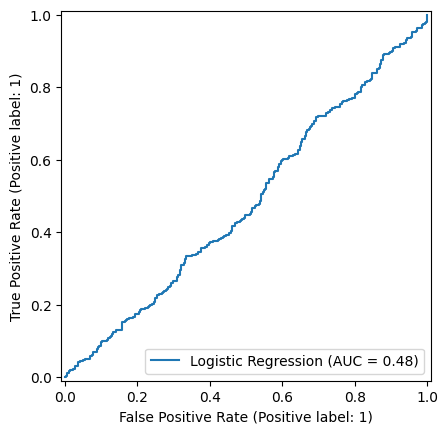

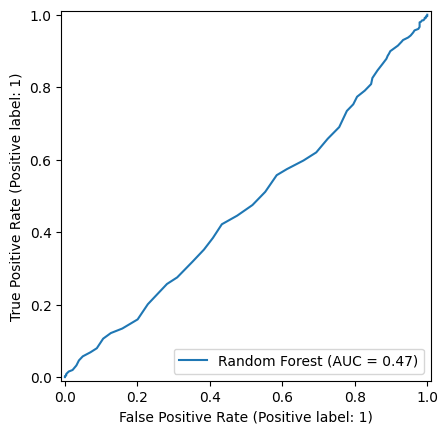

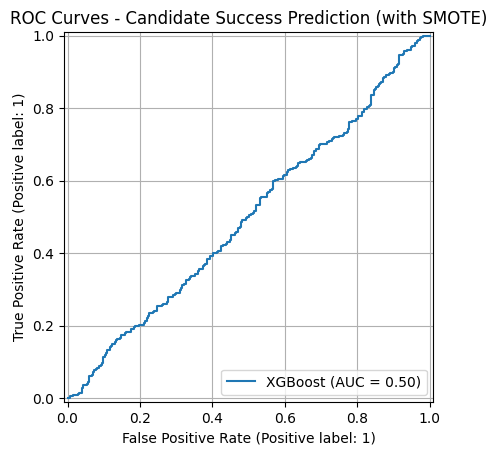

In [9]:

#  Visualize ROC Curves for all three models
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest')
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name='XGBoost')
plt.title("ROC Curves - Candidate Success Prediction (with SMOTE)")
plt.grid()
plt.show()


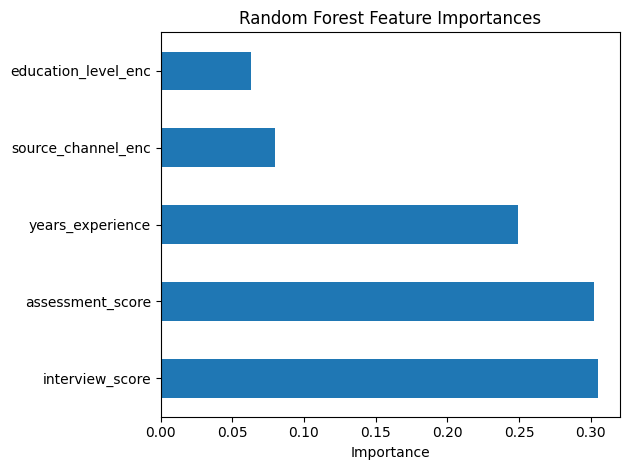

In [10]:
# Optional: Show feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Even with SMOTE and class weighting, your models are still heavily biased toward predicting class 1 (retained), and all ROC AUCs are hovering around 0.47–0.50, which is close to random guessing.